In [ ]:
# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(study_results, mouse_metadata, how='left', on="Mouse ID")

# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice.
number_of_mice = mouse_study_complete["Mouse ID"].nunique()
number_of_mice

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_id = mouse_study_complete.loc[mouse_study_complete.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_id

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_id_df = mouse_study_complete.loc[mouse_study_complete["Mouse ID"] =="g989", :]
duplicate_id_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = mouse_study_complete[mouse_study_complete['Mouse ID'] != 'g989']
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice in the clean DataFrame.
amount_of_mice = cleaned_data['Mouse ID'].nunique()
amount_of_mice

248

In [ ]:
## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean = mouse_study_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = mouse_study_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = mouse_study_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = mouse_study_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = mouse_study_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_table = pd.DataFrame({"Mean Tumor Volume": mean,
                              "Median Tumor Voume": median, 
                              "Variance Tumor Volume": var, 
                              "Std. Dev Tumor Volume": std, 
                              "Std Error Tumor Volume": sem})

summary_table



,Mean Tumor Volume,Median Tumor Voume,Variance Tumor Volume,Std. Dev Tumor Volume,Std Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen 
#stat = ['mean', 'median', 'var', 'std', 'sem']
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = mouse_study_complete.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median','var','std','sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [ ]:
## Bar and Pie Charts

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_id = cleaned_data["Drug Regimen"].value_counts()
mouse_id

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

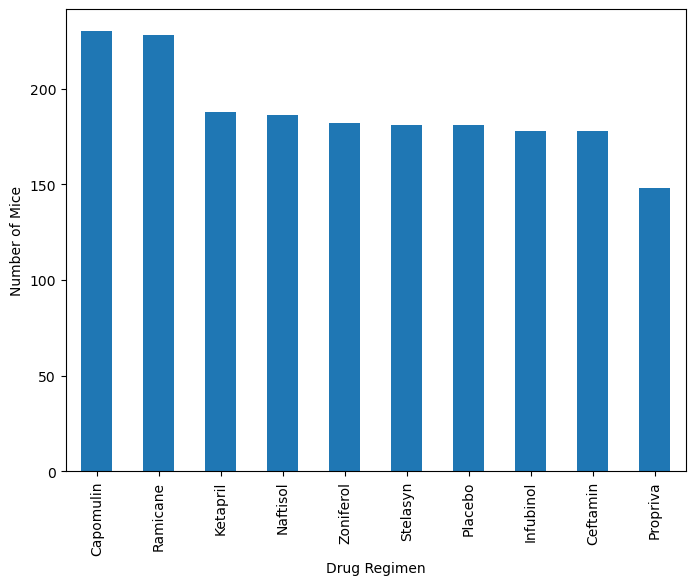

In [15]:
count_chart = mouse_id.plot(kind='bar', figsize=(8,6))

count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Mice")

plt.tight_layout
plt.show()

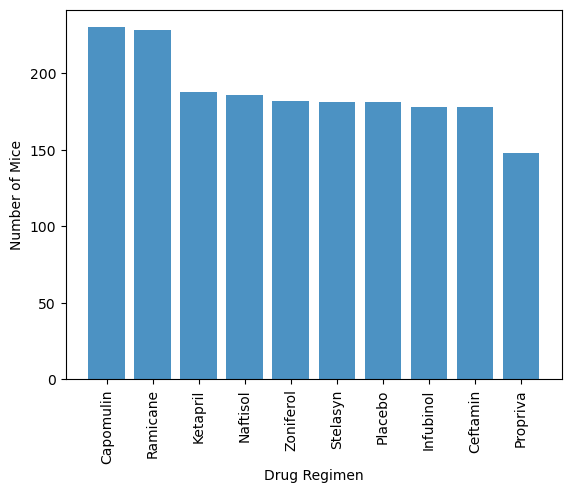

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis= mouse_id.index.values
y_axis= mouse_id.values
plt.bar(x_axis, y_axis, alpha=0.8, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()


Sex
Male      958
Female    935
Name: count, dtype: int64


<Axes: title={'center': 'Male vs Female Mice'}, ylabel='count'>

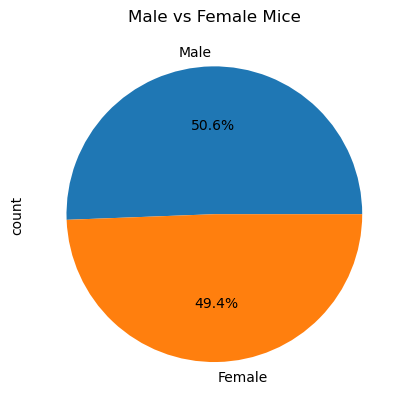

In [16]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_data = mouse_study_complete["Sex"].value_counts()
print(gender_data)

# Make the pie chart
plt.title("Male vs Female Mice")
gender_data.plot.pie(autopct= "%1.1F%%")

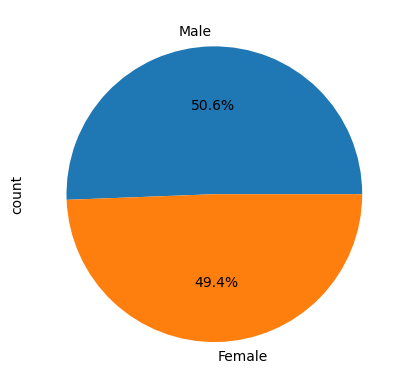

In [17]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
labels = ["Male", "Female"]
sizes = [49.4, 51.6]

# Make the pie chart
gender_data.plot.pie(autopct= "%1.1F%%")
plt.show()

In [ ]:
## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = mouse_study_complete.groupby(["Mouse ID"])['Timepoint'].max()
greatest_timepoint_df = pd.DataFrame(greatest_timepoint)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_timepoint_df = pd.merge(mouse_study_complete, greatest_timepoint_df, on=("Mouse ID", "Timepoint"), how="right")
merge_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [66]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    max_tumor = merge_timepoint_df.loc[merge_timepoint_df["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    quartiles = max_tumor.quantile([.25,.5,.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    iqr = Q3 - Q1
    lower_bound = Q1 - (1.5*iqr)
    upper_bound = Q3 + (1.5*iqr)
    
    print(f"First Quartile (Q1) for {drug} is: {Q1}")
    print(f"Third Quartile (Q3) for {drug} is : {Q3}")
    print(f"The interquartile range for {drug} is: {iqr}")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    
    # Determine outliers using upper and lower bounds
    outliers = max_tumor.loc[(max_tumor < lower_bound) | (max_tumor > upper_bound)]
    
    if outliers.empty:
        print(f"{drug} has no potential outliers")
    else:
        print(f"{drug} potential outliers:")
        print(outliers)
    
    print("-----------------------------------------------")
    # add subset
    tumor_vol_data.append(max_tumor)

First Quartile (Q1) for Capomulin is: 32.37735684
Third Quartile (Q3) for Capomulin is : 40.1592203
The interquartile range for Capomulin is: 7.781863460000004
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.
Capomulin has no potential outliers
-----------------------------------------------
First Quartile (Q1) for Ramicane is: 31.56046955
Third Quartile (Q3) for Ramicane is : 40.65900627
The interquartile range for Ramicane is: 9.098536719999998
Values below 17.912664470000003 for Ramicane could be outliers.
Values above 54.30681135 for Ramicane could be outliers.
Ramicane has no potential outliers
-----------------------------------------------
First Quartile (Q1) for Infubinol is: 54.04860769
Third Quartile (Q3) for Infubinol is : 65.52574285
The interquartile range for Infubinol is: 11.477135160000003
Values below 36.83290494999999 for Infubinol could be outliers.
Values above 82.74144559000001 for Infubinol c

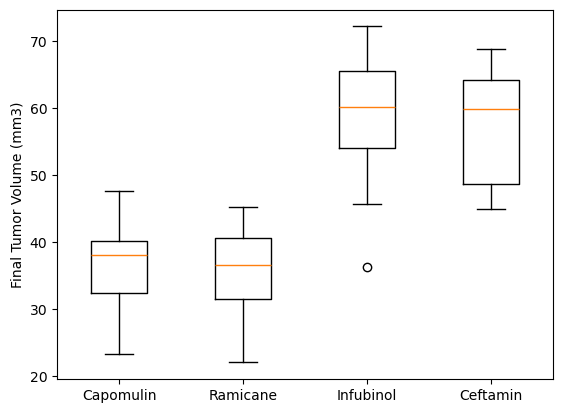

In [67]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_data, showfliers=True)     

#set the ticks and lables
ax1.set_xticks(range(1, len(treatments) +1))
ax1.set_xticklabels(treatments)
plt.show()

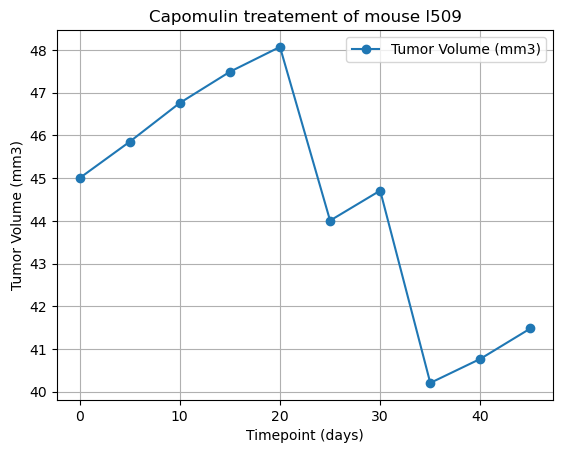

In [83]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_mouse = mouse_study_complete.loc[mouse_study_complete["Mouse ID"]== "l509",:]
cap_mouse
x_axis = cap_mouse["Timepoint"]
y_axis = cap_mouse["Tumor Volume (mm3)"]


plt.figure()
plt.plot(x_axis, y_axis, marker='o', label="Tumor Volume (mm3)")
plt.title("Capomulin treatement of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()
plt.grid()
plt.savefig('linechart.png')
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen